In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Boston House Pricing Dataset

In [309]:
df = pd.read_csv('boston.csv',usecols=['RM','LSTAT','PTRATIO','MEDV'])

In [310]:
df.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [311]:
df = df[df['MEDV'] != 50.0]

In [312]:
df = df[df['RM']!=max(df['RM'])]

In [313]:
df.shape

(489, 4)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   PTRATIO  489 non-null    float64
 2   LSTAT    489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 19.1 KB


### Check missing values

In [315]:
df.isnull().sum()

RM         0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### Summarizing stats of the data

In [316]:
df.describe()

,RM,PTRATIO,LSTAT,MEDV
count,489.000000,489.000000,489.000000,489.000000
mean,6.240288,18.516564,12.939632,21.635378
std,0.643650,2.111268,7.081990,7.873347
min,3.561000,12.600000,1.980000,5.000000
25%,5.880000,17.400000,7.370000,16.700000
50%,6.185000,19.100000,11.690000,20.900000
75%,6.575000,20.200000,17.120000,24.700000
max,8.398000,22.000000,37.970000,48.800000


###Exploratory Data Analysis

#### Correlation

In [317]:
df.corr()

,RM,PTRATIO,LSTAT,MEDV
RM,1.000000,-0.304559,-0.612033,0.697209
PTRATIO,-0.304559,1.000000,0.360445,-0.519034
LSTAT,-0.612033,0.360445,1.000000,-0.760670
MEDV,0.697209,-0.519034,-0.760670,1.000000


<Axes: xlabel='RM', ylabel='MEDV'>

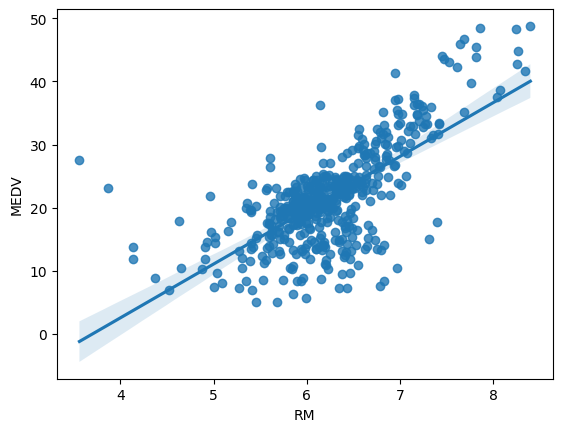

In [318]:
sns.regplot(x="RM", y="MEDV", data=df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

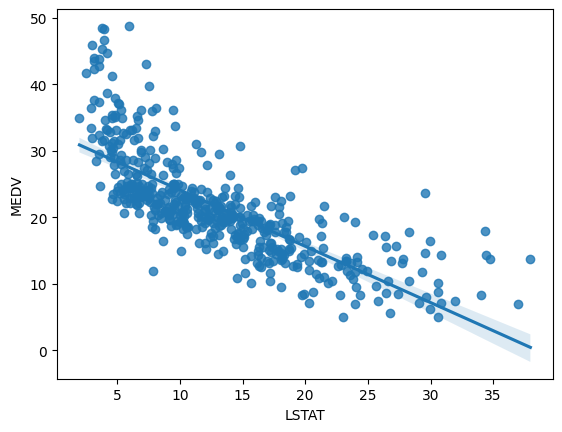

In [319]:
sns.regplot(x="LSTAT", y="MEDV", data=df)

<Axes: xlabel='PTRATIO', ylabel='LSTAT'>

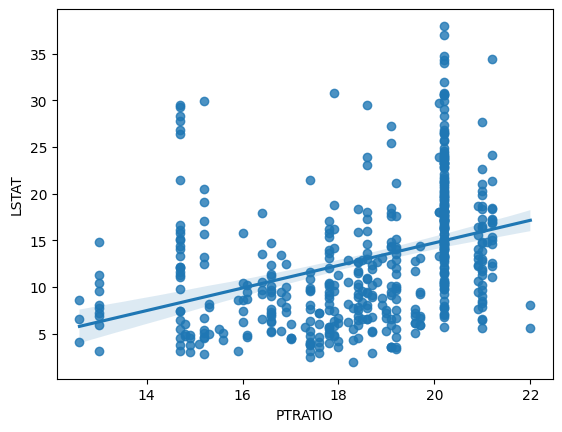

In [320]:
sns.regplot(x="PTRATIO", y="LSTAT", data=df)

<Axes: >

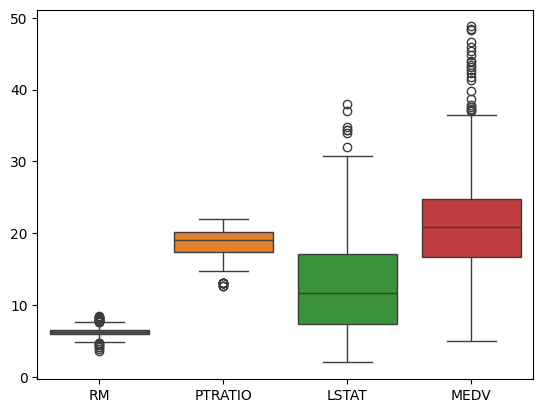

In [321]:
sns.boxplot(df)

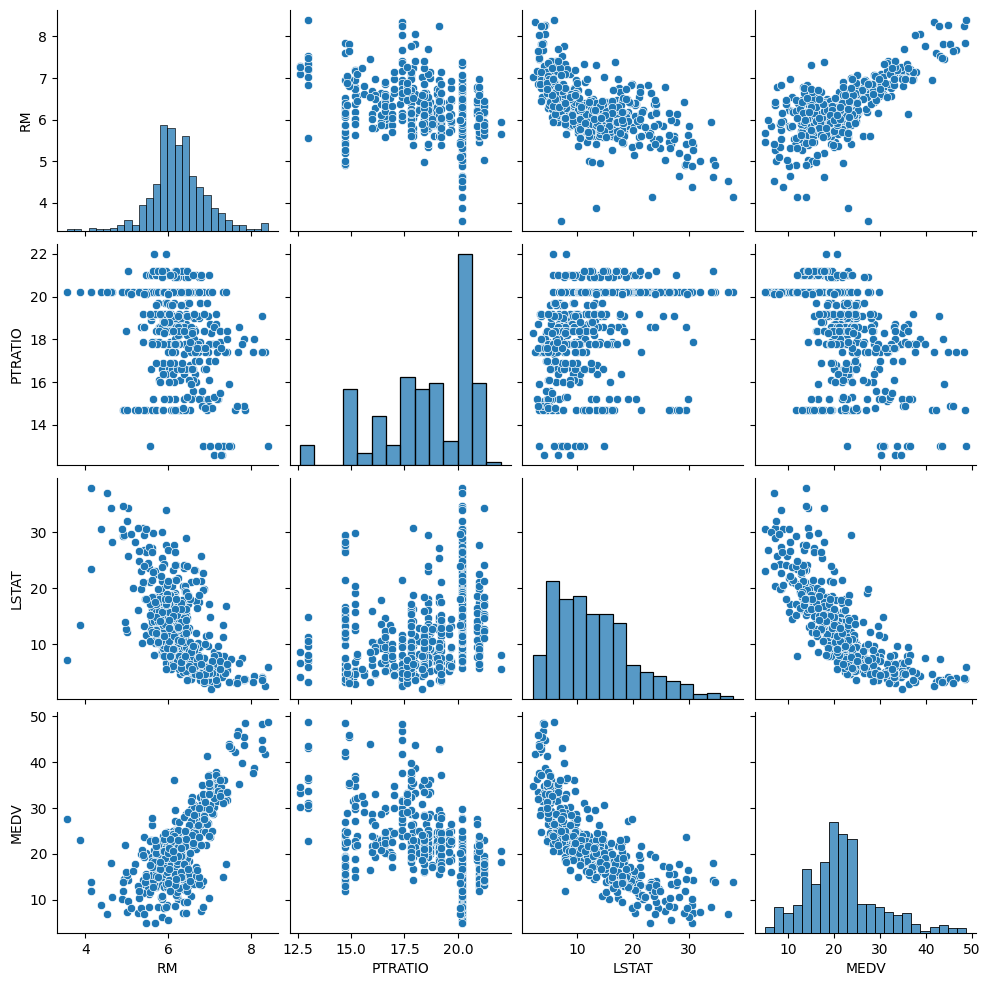

In [322]:
sns.pairplot(df)

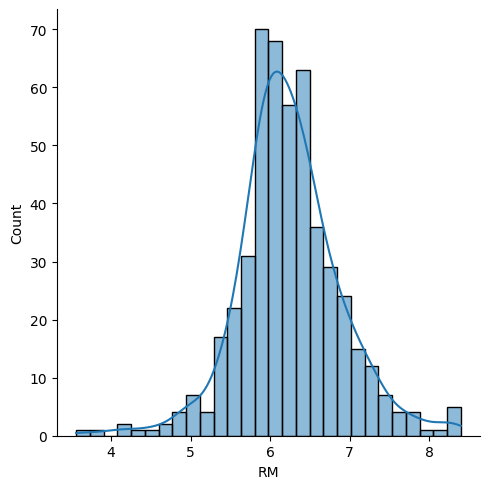

In [323]:
sns.displot(df['RM'],kde=True)

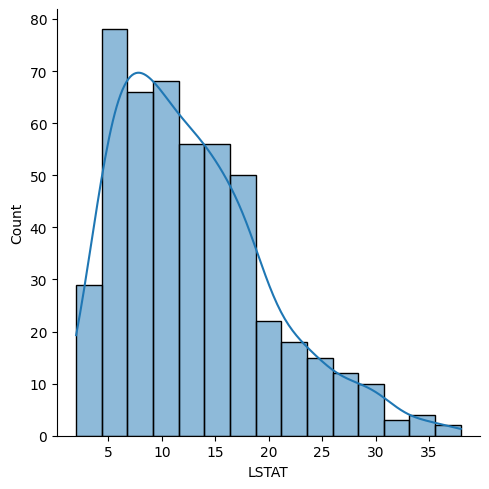

In [324]:
sns.displot(df['LSTAT'],kde=True)

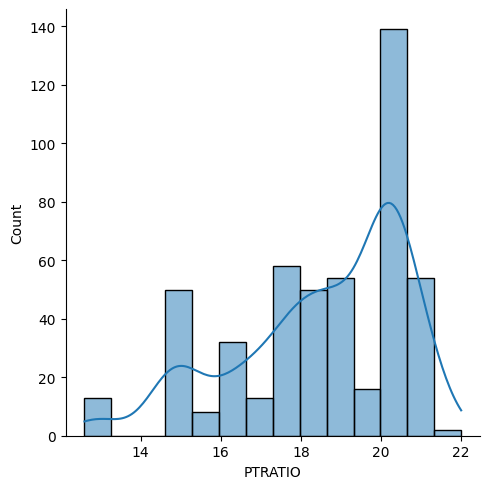

In [325]:
sns.displot(df['PTRATIO'],kde=True)

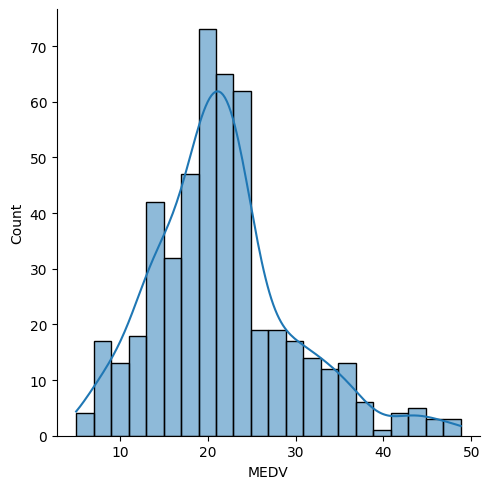

In [326]:
sns.displot(df['MEDV'],kde=True)

### Independent and Dependent features

In [327]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [328]:
print(x.shape)
print(y.shape)

(489, 3)
(489,)


In [329]:
x.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [330]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Train Test Split

In [331]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [332]:
x_train

,RM,PTRATIO,LSTAT
318,6.382,18.4,10.36
58,6.145,19.7,6.86
441,6.406,20.2,19.52
78,6.232,18.7,12.34
456,5.976,20.2,19.01
...,...,...,...
264,7.206,13.0,8.10
72,6.065,19.2,5.52
413,5.155,20.2,20.08
243,6.393,16.6,5.19


In [333]:
x_test

,RM,PTRATIO,LSTAT
474,5.427,20.2,18.14
107,6.127,20.9,14.09
169,6.402,14.7,11.32
203,7.853,14.7,3.81
463,6.513,20.2,10.29
...,...,...,...
92,6.442,18.2,8.16
402,6.404,20.2,20.31
119,5.731,17.8,13.61
271,6.240,18.6,6.59


### Standardize the dataset

In [334]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [335]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [336]:
x_train

array([[ 0.25711281, -0.07169629, -0.37962332],
       [-0.10917422,  0.55233152, -0.8636671 ],
       [ 0.29420516,  0.79234222,  0.88718841],
       ...,
       [-1.63923397,  0.79234222,  0.96463541],
       [ 0.27411347, -0.9357348 , -1.09462513],
       [-0.56510112,  0.31232083, -0.59951749]])

In [337]:
x_test

array([[-1.21885392,  0.79234222,  0.69633686],
       [-0.13699349,  1.1283572 ,  0.13622906],
       [ 0.2880231 , -1.84777545, -0.24685702],
       [ 2.53056521, -1.84777545, -1.28547668],
       [ 0.45957526,  0.79234222, -0.38930419],
       [ 0.15974537, -1.84777545, -0.27728263],
       [ 0.41475533,  0.79234222,  0.7710179 ],
       [ 0.15356331, -0.9357348 , -0.94249708],
       [-0.18490445,  1.17635934,  1.00059295],
       [ 0.15510882,  0.79234222, -1.026859  ],
       [-0.5218267 ,  0.16831441, -0.6921773 ],
       [ 0.6404005 , -0.02369415, -0.90930551],
       [-0.55582803,  0.02430799, -0.01451601],
       [ 0.41011878, -0.9357348 , -0.93281621],
       [-1.87878878,  0.79234222,  2.61176725],
       [-0.77683666,  0.79234222,  0.22888886],
       [-0.14472107, -0.07169629, -0.98536953],
       [-0.3765483 , -0.07169629, -0.43355962],
       [ 0.45493871, -1.84777545, -0.79036904],
       [ 1.13651078, -0.55171768, -0.46951716],
       [-0.31163667,  0.12031227, -0.356

### Model Training

In [338]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [339]:
regression=LinearRegression()

In [340]:
regression.fit(x_train, y_train)

LinearRegression()

### Print Coefficients and Intercept

In [341]:
print(regression.coef_)

[ 2.43060802 -2.02325801 -3.78103233]


In [342]:
print(regression.intercept_)

21.705370843989776


### Prediction with Test Data

In [343]:
y_pred=regression.predict(x_test)

In [344]:
y_pred

array([14.50682982, 18.57434917, 27.07734298, 36.4551383 , 22.69127714,
       26.88059029, 18.19512212, 27.53546793, 15.09258786, 24.36185392,
       22.71361596, 26.74798635, 20.36007494, 28.12245001,  5.66048264,
       17.34863649, 25.22438481, 22.57449257, 29.5380859 , 27.35930985,
       22.05095481, 18.81967426, 15.59364378, 29.49227475, 34.85025886,
       18.74519239, 17.95776753, 17.61400055, 15.21945282, 20.77144377,
       31.90658088, 30.59107358, 30.88610363, 29.12336862, 27.37557897,
       27.8264669 , 26.76266797, 27.45272293, 33.84816824, 23.51404851,
       19.30116688, 18.66067975, 19.00232811, 23.9721232 ,  9.09528054,
       20.7563824 , 24.82431766, 25.34422259, 26.49267801, 25.69032644,
       23.16872704, 19.3110834 , 20.22854915, 29.84414897, 17.65929452,
       20.27340476, 18.937383  , 25.53753136, 34.89093103, 22.1901078 ,
       16.72919098, 28.77427226, 35.23974875,  6.94551634, 17.0464012 ,
       17.16928699, 18.22995214, 12.01049657, 26.02031942, 21.63

In [345]:
sgd_reg = SGDRegressor()

In [346]:
sgd_reg.fit(x_train,y_train)

SGDRegressor()

In [347]:
y_pred_sgd=sgd_reg.predict(x_test)

In [348]:
r2_score(y_test,y_pred_sgd)

0.7033081250321118

### Performance metrics

In [349]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

3.384249407374938
18.253330016879534


In [350]:
score=r2_score(y_test, y_pred)
print(score)

0.7042069943455348


###New Data Prediction

In [351]:
x_test[0]

array([-1.21885392,  0.79234222,  0.69633686])

In [352]:
new_data=x_test[0].reshape(1, -1)

In [353]:
regression.predict(new_data)

array([14.50682982])

In [354]:
y_pred[0]

14.506829822678577

In [355]:
from sklearn.tree import DecisionTreeRegressor

In [356]:
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [357]:
for i in depths:
  tree = DecisionTreeRegressor(max_depth=i)
  tree.fit(x_train,y_train)
  y_pred_tree=tree.predict(x_test)
  print("Max Depth:", i, " Score: ", r2_score(y_test, y_pred_tree))

Max Depth: 1  Score:  0.39712321244179594
Max Depth: 2  Score:  0.6800340369592353
Max Depth: 3  Score:  0.751375169072068
Max Depth: 4  Score:  0.7776833021065128
Max Depth: 5  Score:  0.7878793627100612
Max Depth: 6  Score:  0.7878236788256853
Max Depth: 7  Score:  0.7833201734492534
Max Depth: 8  Score:  0.7560525603454372
Max Depth: 9  Score:  0.7427491045987258
Max Depth: 10  Score:  0.7428136145486658


###Max Depth 5 gives best result

In [358]:
tree = DecisionTreeRegressor(max_depth=5)

In [359]:
tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [360]:
y_pred=tree.predict(x_test)

In [361]:
r2_score(y_test,y_pred)

0.7878793627100612

In [362]:
import pickle

In [363]:
tree_model = pickle.dump(tree, open('model.pkl','wb'))

In [364]:
scaler = pickle.dump(scaler, open('scaler.pkl','wb'))